In [1]:
import ROOT
from ROOT import VecOps
import numpy as np
from akktool.akkhelpers import deltar,myphoton,cleanedjets
from akktool.akkhelpers import getGenIndex,print_event

# Open the NanoAOD file
nanoDir="/Users/kunori/skdir/vkk/nanoAOD/"
nanoFile=nanoDir+"signal_M1500_0_5_18.root"
file = ROOT.TFile.Open(nanoFile)
tree = file.Get("Events")

Welcome to JupyROOT 6.26/04


Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [2]:
def getEventCategory(t):
    """
    category: 0=undefined, 1=leptonic, 2=semi leptonic, 4=hadronic
    """
    category=0
    
    genIdx=getGenIndex(t)  #   get a dictionary of genpart index
    """
    for ix, key in enumerate(genIdx):
        print("key",key,ix) 
    print(genIdx["wp0"],t.GenPart_pdgId[genIdx["wp0"]])
    print(genIdx["wp1"],t.GenPart_pdgId[genIdx["wp1"]])
    print(genIdx["wm0"],t.GenPart_pdgId[genIdx["wm0"]])
    print(genIdx["wm1"],t.GenPart_pdgId[genIdx["wm1"]])
    """
    if ("wp0" in genIdx) and ("wm0" in genIdx):
        pass
    else:
        return
    
    a=abs(t.GenPart_pdgId[genIdx["wp0"]])
    b=abs(t.GenPart_pdgId[genIdx["wm0"]])
    if a<10 and b<10:
        category=4
    if (a<10 and b>10) or (a>10 and b<10):
        category=2
    if (a>10 and b>10):
        category=1

    return category

nPrint=0

h1={}
t1f = ROOT.TH1F('t1f', 'WP',10,0,10)
t2f = ROOT.TH1F('t2f', 'WP',50,0,500)
s="FatJetPt"
h1[s]=ROOT.TH1F(s,s,100,0.0,1000.0)


for it, t in enumerate(tree):
    # dothis=[0,1,20,26,40]
    # if not(it in dothis):
    #     continue
    if it >= 100:
        break
    
    # a=[]
    # a=["met","genPart","recoPhoton","recoPhoton_all","recoFatjet","recoFatjet_all"]
    # a=["met","genPart","recoPhoton","recoPhoton_all","recoFatjet"]
    # print_event(it, t,[])
    category=getEventCategory(t)
    # print("category",category)
    if category<4:
        continue
    
    photons=myphoton(t)
    if len(photons) > 0:
        jets=cleanedjets(t)
        njets=len(jets)
        t1f.Fill(njets)
        for ix in range(njets):
            h1["FatJetPt"].Fill(t.FatJet_pt[ix])

        """
        if njets==1 and nPrint<10:
            nPrint=nPrint+1
            print_event(it, t,[])
        """
print("end job...")

end job...


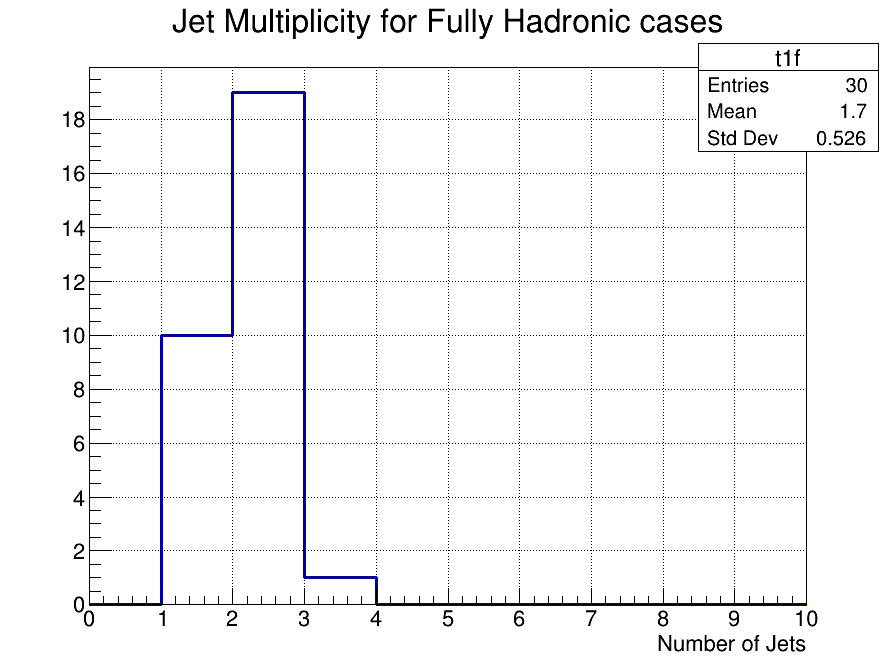

In [3]:
c1 = ROOT.TCanvas( 'c1', 'test', 200, 10, 900, 700)
t1f.Draw('COLZ')
t1f.SetTitle("Jet Multiplicity for Fully Hadronic cases")
t1f.GetXaxis().SetTitle("Number of Jets")
t1f.GetYaxis().SetTitle("")
t1f.SetLineWidth(3)
#t1f.Fit("gaus","","",0,2)
#ROOT.gStyle.SetOptFit(1111)
c1.SetGrid()
#c1.SetLogy()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file fatjet_pt.pdf has been created


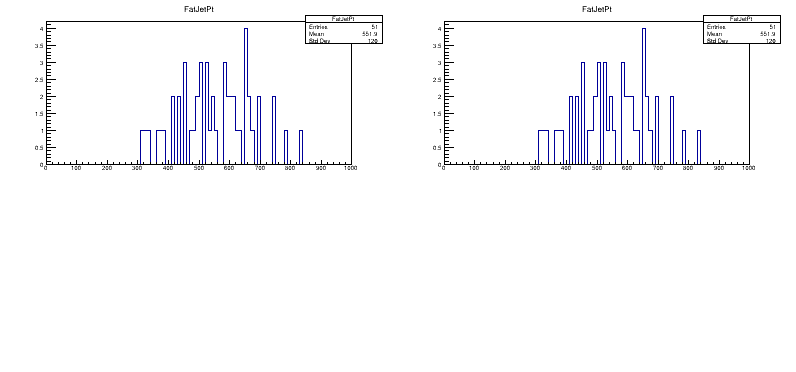

In [4]:
c3 = ROOT.TCanvas( 'c1', 'test', 800,400)
c3.Divide(2,2)
c3.cd(1)
h1["FatJetPt"].Draw()
c3.cd(2)
h1["FatJetPt"].Draw()

pdfname="fatjet_pt.pdf"
c3.SaveAs(pdfname)

c3.Draw()